In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/biosensor_dataset_with_target.csv")
df.head()

,Heart_Rate,Acc_X,Acc_Y,Acc_Z,Gyro_X,Gyro_Y,Gyro_Z,Event_Label,Timestamp,Athlete_ID
0,166,-2.598157,2.205079,-0.649084,-48.457966,15.407057,164.550534,Accel,2025-05-11 12:14:53.417747,A001
1,159,-2.862471,2.173831,-2.054184,5.137738,34.974254,-15.283653,Jump_Takeoff,2025-05-11 12:14:53.517747,A001
2,120,-1.045441,2.755975,2.696018,-175.960480,-107.481553,177.757215,Stop,2025-05-11 12:14:53.617747,A001
3,119,2.931939,0.005220,-1.835028,-8.255970,131.909447,-172.149554,Sprint_Mid,2025-05-11 12:14:53.717747,A001
4,121,2.517730,1.217080,1.611578,-44.266911,147.303725,104.186863,Start_Run,2025-05-11 12:14:53.817747,A001


Now that we have our dataset, let's see what this data set contains. It's important to note that there is no column present for age, gender, or any other kind of demographic data.

In [3]:
# Helper methods

def get_number_of_participants(df):
    return df["Athlete_ID"].nunique()

def get_days_per_participant(df):
    df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")
    dates = df.assign(Date=df["Timestamp"].dt.date)
    return dates.groupby("Athlete_ID")["Date"].nunique().sort_index()

def get_label_stats(df):
    unique_labels = df["Event_Label"].nunique()
    label_counts = df["Event_Label"].value_counts()
    return unique_labels, label_counts

def get_durations(df):
    """
    Returns a DataFrame indexed by Athlete_ID with start/end and durations.
    Durations provided in seconds, minutes, and hours.
    """
    agg = df.groupby("Athlete_ID")["Timestamp"].agg(start="min", end="max")
    delta = (agg["end"] - agg["start"]).dt.total_seconds()
    out = agg.copy()
    out["duration_seconds"] = delta
    out["duration_minutes"] = delta / 60
    out["duration_hours"] = delta / 3600
    return out

# Calculate stats

num_participants = get_number_of_participants(df)
days_per_participant = get_days_per_participant(df)
avg_days = days_per_participant.mean()
unique_labels, label_counts = get_label_stats(df)
durations = get_durations(df)

# print out stats
print(f"Number of participants: {num_participants}")
print(f"\nAverage days per participant: {avg_days:.2f}")
print(f"\nTotal unique labels: {unique_labels}")
print("\nLabels:")
print(label_counts)

print("\nRecording duration per participant (seconds):")
print(durations["duration_seconds"].round(3))

Number of participants: 5

Average days per participant: 1.00

Total unique labels: 6

Labels:
Event_Label
Start_Run       281
Stop            257
Jump_Takeoff    246
Sprint_Mid      245
Accel           241
Landing         230
Name: count, dtype: int64

Recording duration per participant (seconds):
Athlete_ID
A001    29.9
A002    29.9
A003    29.9
A004    29.9
A005    29.9
Name: duration_seconds, dtype: float64


Let's also visualize the data so that it is easier to understand.

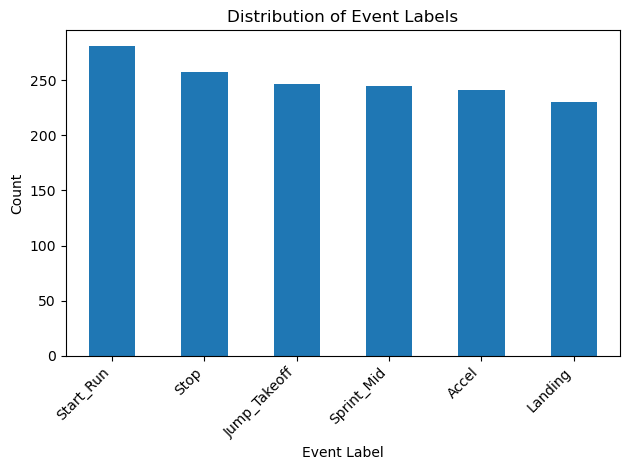

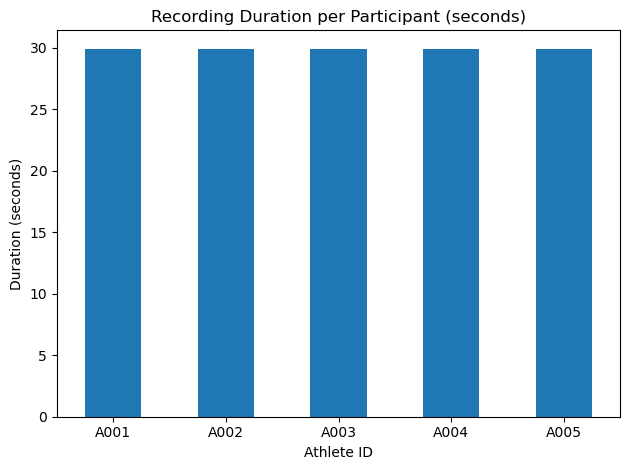

In [4]:
# 1) Label distribution
plt.figure()
label_counts.plot(kind="bar")
plt.title("Distribution of Event Labels")
plt.xlabel("Event Label")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 2) Recording duration per participant (hours)
plt.figure()
durations["duration_seconds"].plot(kind="bar")
plt.title("Recording Duration per Participant (seconds)")
plt.xlabel("Athlete ID")
plt.ylabel("Duration (seconds)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()